In [1]:
import numpy as np
from math import pi as pi
import cmath
from scipy import signal, misc
from scipy.fft import fft, rfft, irfft
import matplotlib.pyplot as plt
from zplane import zplane
from matplotlib import patches
from matplotlib.pyplot import axvline, axhline
from collections import defaultdict
from scipy.signal import (freqz, butter, bessel, cheby1, cheby2, ellip,
                            tf2zpk, zpk2tf, lfilter, buttap, bilinear, cheb2ord, cheb2ap
                            )
from numpy import asarray, tan, array, pi, arange, cos, log10, unwrap, angle
from matplotlib.pyplot import (stem, title, grid, show, plot, xlabel,
                                ylabel, subplot, xscale, figure, xlim,
                                margins)
    

In [2]:
name = ' problema 1.a'
num = np.poly1d([1,2])
d1= np.poly1d([1,1])
d2= np.poly1d([1,3])
den = d1*d2
sys = signal.TransferFunction(num,den)
z,p,k = signal.tf2zpk(num,den)


In [3]:
print(z,p,k)

[-2.] [-3. -1.] 1.0


In [4]:
def plot_zpk(zeros, poles, k):
    t1 = plt.plot(zeros.real, zeros.imag, 'o', markersize=10.0, alpha=0.9)
    t2 = plt.plot(poles.real, poles.imag, 'x', markersize=10.0, alpha=0.9)
    grid(True, color = '0.7', linestyle='-', which='major', axis='both')
    grid(True, color = '0.9', linestyle='-', which='minor', axis='both')
    title('Poles and zeros')
    mark_overlapping(zeros)
    mark_overlapping(poles)

def mark_overlapping(items):
    """
    Given `items` as a list of complex coordinates, make a tally of identical 
    values, and, if there is more than one, plot a superscript on the graph.
    """
    d = defaultdict(int)
    for i in items:
        d[i] += 1
    for item, count in d.items():
        if count > 1:
            plt.text(item.real, item.imag, r' ${}^{' + str(count) + '}$', fontsize=13)

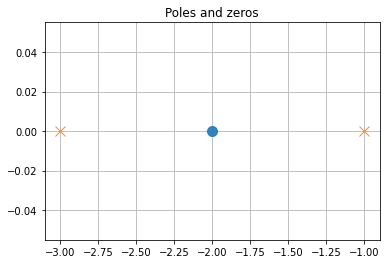

In [5]:
plot_zpk(z,p,k)

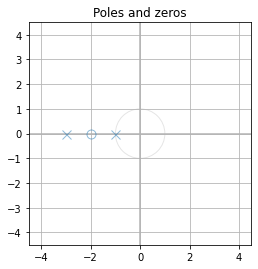

In [6]:
    # Create zero-pole plot
    figure(figsize=(16, 9))
    subplot(2, 2, 1)
    #grid(True, color='0.9', linestyle='-', which='both', axis='both')
    grid(True, color = '0.7', linestyle='-', which='major', axis='both')
    grid(True, color = '0.9', linestyle='-', which='minor', axis='both')
    title('Poles and zeros')
    zplane(z, p)


In [7]:
from sympy import *

from sympy.abc import x,y

In [8]:
#z1 = poly(1000 + x*0)
z2 = poly(250 + 0.05*x)
z3 = poly(1e-6*x**-1)
z4 = (1/z2 + 1/z3)**-1
simplify(z4)
tf = z4/(z4+1000)
tf = simplify(tf)
numer(tf)/expand(denom(tf))

(0.05*x + 250.0)/(50000000.0*x**2 + 250000000000.05*x + 1250.0)

In [9]:
num = poly(250*1e6 + 5e4 *x)

In [10]:
den = poly(1e-6 + 250*x + 0.05*x**2)

In [11]:
z4 = num/den

In [12]:
tf = z4/(1000 + z4)

In [13]:
tf


(50000.0*x + 250000000.0)/(((50000.0*x + 250000000.0)/(0.05*x**2 + 250.0*x + 1.0e-6) + 1000)*(0.05*x**2 + 250.0*x + 1.0e-6))

In [14]:
tf = simplify(tf)
tf

(50000.0*x + 250000000.0)/(50.0*x**2 + 300000.0*x + 250000000.001)

In [15]:

#z1 = poly(1000 + x*0)
R1=40e3
z2 = poly(10e3 + 500e-9*x**-1)
z3 = poly(1e-6*x**-1)
z4 = (1/z2 + 1/z3)**-1
simplify(z4)
#tf = z4/(z4+40e3)
#tf = simplify(tf)
#numer(tf)/expand(denom(tf))

(10000.0*x + 5.0e-7)/(x*(10000000000.0*x + 1.5))

In [16]:
simplify(z4/R1)

(0.25*x + 1.25e-11)/(x*(10000000000.0*x + 1.5))

In [17]:
from sympy import *
s, w, c1, c2, r1, r2 = symbols('s w c1 c2 r1 r2', domain="ZZ", real=True)
#z1 = poly(1000 + x*0)
R1=40e3
R2=10e3
C1=250-9
C2=500-9
z2 = poly(r2 + c2*s**-1, domain="ZZ")
z3 = poly(c1*s**-1, domain="ZZ")
z4 = (1/z2 + 1/z3)**-1
tf = cancel(simplify(-z4/r1))
tf



-(c1*c2 + c1*r2*s)/(c1*r1*s + c2*r1*s + r1*r2*s**2)

In [18]:
tf_v=tf.subs([(c1,C1), (c2,C2),  (r1,R1), (r2,R2)], domain="ZZ")
tf_v_abs=abs(tf_v)

In [19]:
tf2=tf.subs([(s,I*w)])
abs(tf2)


sqrt(c1**2*c2**2 + c1**2*r2**2*w**2)/sqrt(c1**2*r1**2*w**2 + 2*c1*c2*r1**2*w**2 + c2**2*r1**2*w**2 + r1**2*r2**2*w**4)

In [20]:
tf3=tf2.subs([(c1,C1), (c2,C2),  (r1,R1), (r2,R2)], domain="ZZ")
abs(tf3)

0.006025*sqrt(w**2 + 0.00241081)/sqrt(w**4 + 0.00535824*w**2)

In [21]:
cancel(nsimplify(tf3))

(2410000*I*w + 118331)/(400000000*w**2 - 29280000*I*w)

In [22]:
sqrt(1e3*5e-8)

0.00707106781186548

In [23]:
tf4=cancel(nsimplify(tf3))
tf4


(2410000*I*w + 118331)/(400000000*w**2 - 29280000*I*w)

In [24]:
atan(cancel(nsimplify(im(tf4)/re(tf4))))


-atan((25000000*w**2 + 89853)/(602500*w))

In [25]:
cancel(arg(tf4))

arg((10000*I + 491/w)/(2500*w - 183*I))

In [26]:
arg(simplify(tf4, inverse=True))

arg((10000*I*w + 491)/(w*(2500*w - 183*I)))

In [27]:
phi=atan(nsimplify(cancel(im(tf3)/re(tf3))))
phi

-atan((4149377593361*w**2/100000000000 + 74566804979253/500000000000000)/w)

In [170]:
num_list=tf_num.as_poly().as_list()
print(num_list)
den_list=tf_den.as_poly().as_list()
print(den_list)

[-2.41000000000000, -0.118331000000000]
[400.000000000000, 29.2800000000000, 0.0]


In [171]:
tf_sub=tf.subs([(c1,C1), (c2,C2),  (r1,R1), (r2,R2)], domain="ZZ")
nsimplify(tf_sub)
tf_num, tf_den = tf_num/1e6, tf_den/1e6

In [172]:
num_list=tf_num.as_poly().as_list()
den_list=tf_den.as_poly().as_list()
print(tf_num)
print(tf_den)
print(num_list)
print(den_list)

-2.41e-6*s - 1.18331e-7
0.0004*s**2 + 2.928e-5*s
[-2.41000000000000e-6, -1.18331000000000e-7]
[0.000400000000000000, 2.92800000000000e-5, 0.0]


In [173]:
np.logspace(-5,3,50)

array([1.00000000e-05, 1.45634848e-05, 2.12095089e-05, 3.08884360e-05,
       4.49843267e-05, 6.55128557e-05, 9.54095476e-05, 1.38949549e-04,
       2.02358965e-04, 2.94705170e-04, 4.29193426e-04, 6.25055193e-04,
       9.10298178e-04, 1.32571137e-03, 1.93069773e-03, 2.81176870e-03,
       4.09491506e-03, 5.96362332e-03, 8.68511374e-03, 1.26485522e-02,
       1.84206997e-02, 2.68269580e-02, 3.90693994e-02, 5.68986603e-02,
       8.28642773e-02, 1.20679264e-01, 1.75751062e-01, 2.55954792e-01,
       3.72759372e-01, 5.42867544e-01, 7.90604321e-01, 1.15139540e+00,
       1.67683294e+00, 2.44205309e+00, 3.55648031e+00, 5.17947468e+00,
       7.54312006e+00, 1.09854114e+01, 1.59985872e+01, 2.32995181e+01,
       3.39322177e+01, 4.94171336e+01, 7.19685673e+01, 1.04811313e+02,
       1.52641797e+02, 2.22299648e+02, 3.23745754e+02, 4.71486636e+02,
       6.86648845e+02, 1.00000000e+03])

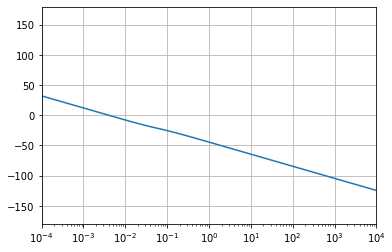

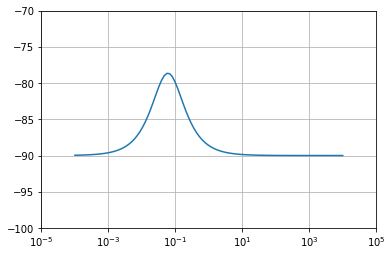

In [237]:
from scipy import signal
import matplotlib.pyplot as plt
tf_sub=tf.subs([(c1,C1), (c2,C2),  (r1,R1), (r2,R2)], domain="ZZ")

tf_num, tf_den = fraction (tf_sub)
tf_num, tf_den = tf_num/1e6, tf_den/1e6
num_list=tf_num.as_poly().as_list()
den_list=tf_den.as_poly().as_list()
s1 = signal.lti([2.41, 0.118331], [400, 29.28, 0.0])
w, mag, phase = s1.bode(w=np.logspace(-4,4,100))
plt.figure() 
plt.xlim([1e-4,1e4])
plt.ylim([-180,180])
plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
plt.semilogx(w, mag)    # Bode magnitude plot

plt.figure()
plt.xlim([1e-5,1e5])
plt.ylim([-100,-70])
plt.semilogx(w, phase)  # Bode phase plot
plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
plt.show()


In [220]:
f(1,0.5)


0.005333786598838394

In [217]:
w, a = symbols('w a')
tf_v=tf.subs([(c1,C1), (c2,C2),  (r1,R1), (r2,R2)], domain="ZZ")
tf_v_abs=abs(tf_v)
tf_p=tf_v_abs.subs([(s,a+I*w)])

f = lambdify([w, a], tf_p)
f(0,0.5)
tf_p

-2410000.0*s - 118331
400000000.0*s**2 + 29280000.0*s
[-0.0732000000000000, 0.0]
[-0.0491000000000000]
-2410000.0*s - 118331
400000000.0*s**2 + 29280000.0*s
[-0.0491000000000000] [-0.0732000000000000, 0.0]


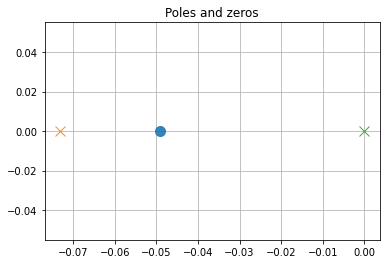

In [176]:
tf2=tf.subs([(c1,C1), (c2,C2),  (r1,R1), (r2,R2)])
n,d = fraction(tf2)
print(n)
print(d)
print(solve(d))
print(solve(n))

print(n)
print(d)
p = solve(d)
z = solve(n)
print(z,p)

plot_zpk_sym(z,p,k)

In [177]:
tf2

-(2410000.0*s + 118331)/(400000000.0*s**2 + 29280000.0*s)

Poly(r2 + s*l, r2, s, l, domain='ZZ')
Poly(c*(1/s), c, 1/s, domain='ZZ')
1/(1/(l*s + r2) + s/c)
-c*(l*s + r2)/(r1*(c + s*(l*s + r2)))
-4.7e-8*s - 2.5e-7
s*(47*s + 250) + 1.0e-6
[-5.31914893617021] [-5.31914893217021, -4.00000000300800e-9]


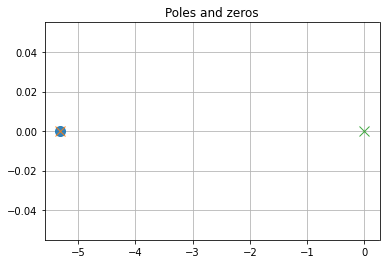

In [229]:
from sympy import *
s, c, l, r1, r2, w= symbols('s c l r1 r2 w', domain = 'ZZ', real=True)
#z1 = poly(1000 + x*0)
R1=1e3
R2=250
C=1e-6
L=50-3
z2 = poly(r2 + l*s, domain = 'ZZ')
print(z2)
z3 = poly(c*s**-1, domain = 'ZZ')
print(z3)
z4 = 1/(1/z2 + 1/z3)
print(z4)
tf = simplify(-z4/r1)
print(tf)


tf2=tf.subs([(c,C), (l,L),  (r1,R1), (r2,R2)])
tf_1=tf
tf2
n,d = fraction(tf2)
print(n)
print(d)
p = solve(d)
z = solve(n)
print(z,p)
k=1
plot_zpk_sym(z,p,k)

In [230]:
w, a = symbols('w a')
tf_v=tf_1.subs([(c,C), (l,L),  (r1,R1), (r2,R2)])
tf_v_abs=abs(tf_v)
tf_p=tf_v_abs.subs([(s,a+I*w)])
tf_p

1.0e-9*Abs((47*a + 47*I*w + 250)/((a + I*w)*(47*a + 47*I*w + 250) + 1.0e-6))

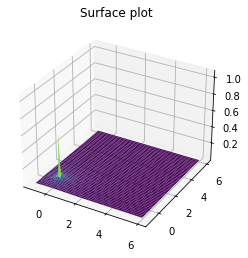

In [233]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
w, a = symbols('w a')
tf_v=tf_1.subs([(c,C), (l,L),  (r1,R1), (r2,R2)])
tf_v_abs=abs(tf_v)
tf_p=tf_v_abs.subs([(s,a+I*w)])
tf_p

f = lambdify([w, a], tf_p)
f(0,0.5)
tf_p
x = np.outer(np.linspace(-1, 6, 300), np.ones(300))
y = x.copy().T # transpose
vf = np.vectorize(f) 
z = vf(x,y)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [179]:
tf2=tf.subs([(c,C), (l,L),  (r1,R1), (r2,R2)])
tf2
n,d = fraction(tf2)
print(n)
print(d)
print(solve(d))
print(solve(n))

-4.7e-8*s - 2.5e-7
s*(47*s + 250) + 1.0e-6
[-5.31914893217021, -4.00000000300800e-9]
[-5.31914893617021]


In [180]:

tf3=tf.subs([(s,I*w)] )
tf3

-c*(I*l*w + r2)/(r1*(c + I*w*(I*l*w + r2)))

In [181]:
fraction(tf3)[0] * conjugate(fraction(tf3)[1]) / ( fraction(tf3)[1] * conjugate(fraction(tf3)[1]))

-c*(I*l*w + r2)/(r1*(c + I*w*(I*l*w + r2)))

In [182]:
cancel( fraction(tf3)[0] * conjugate(fraction(tf3)[1]))/cancel( fraction(tf3)[1] * conjugate(fraction(tf3)[1]))

(-I*c**2*l*r1*w - c**2*r1*r2 + I*c*l**2*r1*w**3 + I*c*r1*r2**2*w)/(c**2*r1**2 - 2*c*l*r1**2*w**2 + l**2*r1**2*w**4 + r1**2*r2**2*w**2)

In [183]:
num_tf2_ex_1 = cancel( fraction(tf3)[0] * conjugate(fraction(tf3)[1]))

In [184]:
theta_1 = atan(nsimplify(cancel(im(num_tf2_ex_1)/re(num_tf2_ex_1))))
theta_1

-atan((-c*l*w + l**2*w**3 + r2**2*w)/(c*r2))

In [185]:
abs(tf3)

sqrt(l**2*w**2 + r2**2)*Abs(c/r1)/sqrt(c**2 - 2*c*l*w**2 + l**2*w**4 + r2**2*w**2)

In [186]:
tf4 = abs(tf3)
tf4

sqrt(l**2*w**2 + r2**2)*Abs(c/r1)/sqrt(c**2 - 2*c*l*w**2 + l**2*w**4 + r2**2*w**2)

In [187]:
tf5=tf4.subs([(c,C), (l,L),  (r1,R1), (r2,R2)])
tf5


4.000000003008e-12*sqrt(2209*w**2 + 62500)/sqrt(0.0353440000531574*w**4 + w**2 + 1.6000000024064e-17)

In [188]:
tf_1=tf3.subs([(c,C), (l,L),  (r1,R1), (r2,R2), (w,x)])
tf_1 = arg(tf_1)
tf_1

arg(-(47*I*x + 250)/(I*x*(47*I*x + 250) + 1.0e-6))

In [189]:
tf6=pi+atan(cancel(nsimplify(im(tf3)/re(tf3))))
tf6

pi - atan((-c*l*w + l**2*w**3 + r2**2*w)/(c*r2))

In [190]:
tf6=atan(simplify(im(tf3)/re(tf3)))
tf6

atan(w*(l*(c - l*w**2) - r2**2)/(c*r2))

In [191]:
tf_im = im(fraction(tf3)[0])
tf_re = re(fraction(tf3)[0])


In [192]:
tf6=atan(tf_im/tf_re)
tf6

atan(l*w/r2)

In [193]:
tf7=theta_1.subs([(c,C), (l,L),  (r1,R1), (r2,R2)])
tf7

-atan(8836000.0*w**3 + 249999999.812*w)

In [194]:
tf7.subs(w,x)

-atan(8836000.0*x**3 + 249999999.812*x)

In [195]:
theta_1 = tf_1%(pi)

theta_1

Mod(arg(-(47*I*x + 250)/(I*x*(47*I*x + 250) + 1.0e-6)), pi)

In [196]:
from sympy.plotting import plot

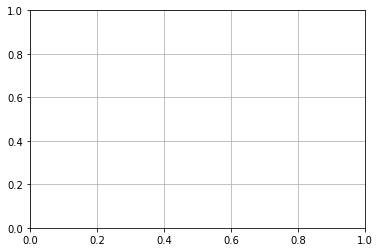

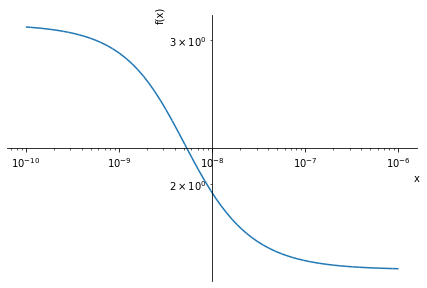

In [197]:

#p1 = plot(tf7, show=False,yscale = 'log', xscale = 'log', xlim = (1e-10,1e20))
#p1 = plot(theta_1,(x, -1e-7,1e-7))
#p1
#p1 = plot(tf5,(w, -1e-7,1e-7), xscale = "log")
#p1 = plot(tf5,(w, 1e-10,1e-6), xscale = "log", yscale = "log", axis_center='auto')
p1.margin=True
p1.backend="matplotlib"
grid(True, color = '0.7', linestyle='-', which='major', axis='both')
p1 = plot(theta_1,(x, 1e-10,1e-6), xscale = "log", yscale = "log", axis_center='auto', grid=True)



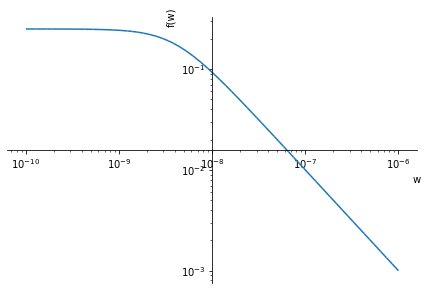

In [198]:
p1 = plot(tf5,(w, 1e-10,1e-6), xscale = "log", yscale = "log", axis_center='auto')


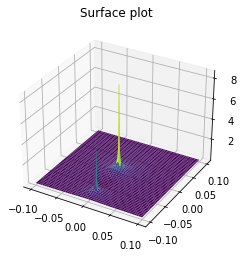

In [226]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
w, a = symbols('w a')
tf_v=tf.subs([(c1,C1), (c2,C2),  (r1,R1), (r2,R2)], domain="ZZ")
tf_v_abs=abs(tf_v)
tf_p=tf_v_abs.subs([(s,a+I*w)])

f = lambdify([w, a], tf_p)
f(0,0.5)
tf_p
x = np.outer(np.linspace(-0.1, 0.1, 300), np.ones(300))
y = x.copy().T # transpose
vf = np.vectorize(f) 
z = vf(x,y)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [200]:
tf2=tf.subs([(c,C), (l,L),  (r1,R1), (r2,R2), (s,I*w)])
print(tf2)
n,d = fraction(tf2)
print(n)
print(d)
print(solve(d))
print(solve(n))

-1.0e-9*(47*I*w + 250)/(I*w*(47*I*w + 250) + 1.0e-6)
-4.7e-8*I*w - 2.5e-7
I*w*(47*I*w + 250) + 1.0e-6
[]
[]


In [201]:
n,d = fraction(tf2)
d.as_coeff_Mul()
#simplify(abs(tf2))
#tf3=tf2.subs([(s,I*w)])
#together(tf3)
tf2

-1.0e-9*(47*I*w + 250)/(I*w*(47*I*w + 250) + 1.0e-6)

In [202]:
together(sqrt( re(tf2)**2 + im(tf2)**2))

6.2499999953e-5*sqrt(w**2*(0.0353440000265787*w**2 + 1)**2 + 1.6000000024064e-17)/(62500*w**2 + 2209*(w**2 - 2.12765957446809e-8)**2)

In [203]:
abs(tf2)

4.000000003008e-12*sqrt(2209*w**2 + 62500)/sqrt(0.0353440000531574*w**4 + w**2 + 1.6000000024064e-17)

In [239]:
def plot_zpk_sym(zeros, poles, k):
    for z in zeros:
        t1 = plt.plot(re(z), im(z), 'o', markersize=10.0, alpha=0.9)
    for p in poles:    
        t2 = plt.plot(re(p), im(p), 'x', markersize=10.0, alpha=0.9)
    grid(True, color = '0.7', linestyle='-', which='major', axis='both')
    grid(True, color = '0.9', linestyle='-', which='minor', axis='both')
    title('Poles and zeros')
    mark_overlapping(zeros)
    mark_overlapping(poles)

def mark_overlapping(items):
    """
    Given `items` as a list of complex coordinates, make a tally of identical 
    values, and, if there is more than one, plot a superscript on the graph.
    """
    d = defaultdict(int)
    for i in items:
        d[i] += 1
    for item, count in d.items():
        if count > 1:
            plt.text(item.real, item.imag, r' ${}^{' + str(count) + '}$', fontsize=13)

s**3 + s
1.0*s**4 + 2.0*s**3 + 4.0*s**2 + 3.0*s + 1.25
[]
[0]


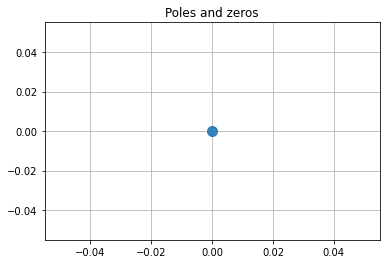

In [248]:
H = together(poly(s*(s**2+1)/(s**4+2*s**3+4*s**2+3*s+1.25), domain="RR"))
den = poly(s**4+2*s**3+4*s**2+3*s+1.25)
num = poly(s*(s**2+1))
H = num/den
H
n,d = fraction(H)
print(n)
print(d)
p = solve(d)
z = solve(n)
print(p)
print(z)

plot_zpk_sym(z,p,k)

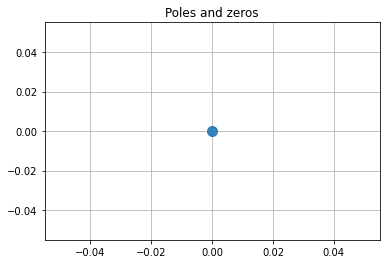

In [241]:
plot_zpk_sym(z,p,k)

In [244]:
z=sym2complex(z)
p=sym2complex(p)

In [245]:
def sym2complex(sym_list):
    out = list()
    for e in sym_list:
        out.append(complex(e))
    return out
print(z, '\n', sym2complex(z))

[0j] 
 [0j]


In [254]:
num_list

[1, 0, 1, 0]

In [258]:
np.array(den_list,dtype=float)

array([1.  , 2.  , 4.  , 3.  , 1.25])

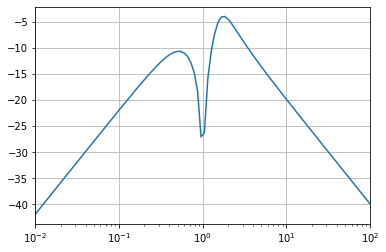

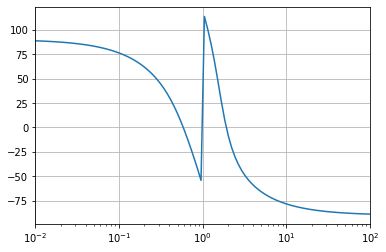

In [265]:
from scipy import signal
import matplotlib.pyplot as plt
tf_sub=tf.subs([(c1,C1), (c2,C2),  (r1,R1), (r2,R2)], domain="ZZ")

tf_num, tf_den = fraction (H)
num_list=tf_num.as_poly().as_list()
den_list=np.array(tf_den.as_poly().as_list(), dtype=float)
s1 = signal.lti([1, 0, 1, 0], den_list)
w, mag, phase = s1.bode(w=np.logspace(-2,2,100))
plt.figure() 
plt.xlim([1e-2,1e2])
#plt.ylim([-180,180])
plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
plt.semilogx(w, mag)    # Bode magnitude plot

plt.figure()
plt.xlim([1e-2,1e2])
#plt.ylim([-100,-70])
plt.semilogx(w, phase)  # Bode phase plot
plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
plt.show()